## 1. Explore Data

#### Import required libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import itertools
import datetime
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load the data

In [2]:
df = pd.read_excel('Homeless in U.S..xlsx')
df.head()

,State,Total Homeless,Population,Percentage,Homeless Households,Veterans,Young Adults
0,California,151278.0,39512223.0,0.003829,7044.0,10980.0,11993.0
1,New York,92091.0,19453561.0,0.004734,15091.0,1270.0,2978.0
2,Florida,28328.0,21477737.0,0.001319,2171.0,2472.0,1450.0
3,Texas,25848.0,28995881.0,0.000891,1919.0,1806.0,1355.0
4,Washington,21577.0,7614893.0,0.002834,1751.0,1585.0,1911.0


In [3]:
df.describe()

,Total Homeless,Population,Percentage,Homeless Households,Veterans,Young Adults
count,52.000000,5.200000e+01,51.000000,50.000000,50.000000,50.000000
mean,10936.634615,6.327044e+06,0.001547,1031.980000,733.160000,693.920000
std,23931.734344,7.331430e+06,0.001474,2324.411073,1561.141084,1723.176372
min,548.000000,5.787590e+05,0.000398,37.000000,49.000000,26.000000
25%,2315.000000,1.694267e+06,0.000855,187.500000,178.500000,147.250000
50%,5004.500000,4.342705e+06,0.000998,309.000000,403.500000,258.000000
75%,9390.250000,7.362761e+06,0.001480,948.500000,687.250000,576.500000
max,151278.000000,3.951222e+07,0.009240,15091.000000,10980.000000,11993.000000


#### Process data

In [4]:
df = df.iloc[:51, :]
df = df[df.State != 'D.C.']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 50
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                50 non-null     object 
 1   Total Homeless       50 non-null     float64
 2   Population           50 non-null     float64
 3   Percentage           50 non-null     float64
 4   Homeless Households  50 non-null     float64
 5   Veterans             50 non-null     float64
 6   Young Adults         50 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df

,State,Total Homeless,Population,Percentage,Homeless Households,Veterans,Young Adults
0,California,151278.0,39512223.0,0.003829,7044.0,10980.0,11993.0
1,New York,92091.0,19453561.0,0.004734,15091.0,1270.0,2978.0
2,Florida,28328.0,21477737.0,0.001319,2171.0,2472.0,1450.0
3,Texas,25848.0,28995881.0,0.000891,1919.0,1806.0,1355.0
4,Washington,21577.0,7614893.0,0.002834,1751.0,1585.0,1911.0
5,Massachusetts,18471.0,6949503.0,0.002658,3766.0,917.0,480.0
6,Oregon,15876.0,4217737.0,0.003764,1147.0,1438.0,1590.0
7,Pennsylvania,13199.0,12801989.0,0.001031,1569.0,857.0,737.0
8,Georgia,10443.0,10617423.0,0.000984,815.0,801.0,596.0
9,Ohio,10345.0,11689100.0,0.000885,999.0,676.0,643.0


In [6]:
#!pip install squarify
import squarify 
df_copy = df.copy()

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_copy['Statecode'] = df_copy['State'].map(us_state_abbrev)

In [7]:
df_copy.head()

,State,Total Homeless,Population,Percentage,Homeless Households,Veterans,Young Adults,Statecode
0,California,151278.0,39512223.0,0.003829,7044.0,10980.0,11993.0,CA
1,New York,92091.0,19453561.0,0.004734,15091.0,1270.0,2978.0,NY
2,Florida,28328.0,21477737.0,0.001319,2171.0,2472.0,1450.0,FL
3,Texas,25848.0,28995881.0,0.000891,1919.0,1806.0,1355.0,TX
4,Washington,21577.0,7614893.0,0.002834,1751.0,1585.0,1911.0,WA


### EDA

In [8]:
## Setting up the configurations
sns.set(context = 'talk', style = 'darkgrid', font_scale = 1)
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
plt.rcParams['axes.unicode_minus'] = False

rc={'font.size': 16, 'axes.labelsize': 17, 'legend.fontsize': 16,\
    'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 17, "lines.linewidth": 2.5}

sns.set(context = 'poster', style = 'darkgrid', font_scale = 1, palette = 'muted', rc = rc)
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

#### Barplot
## Total Homeless by each State (Percentage)

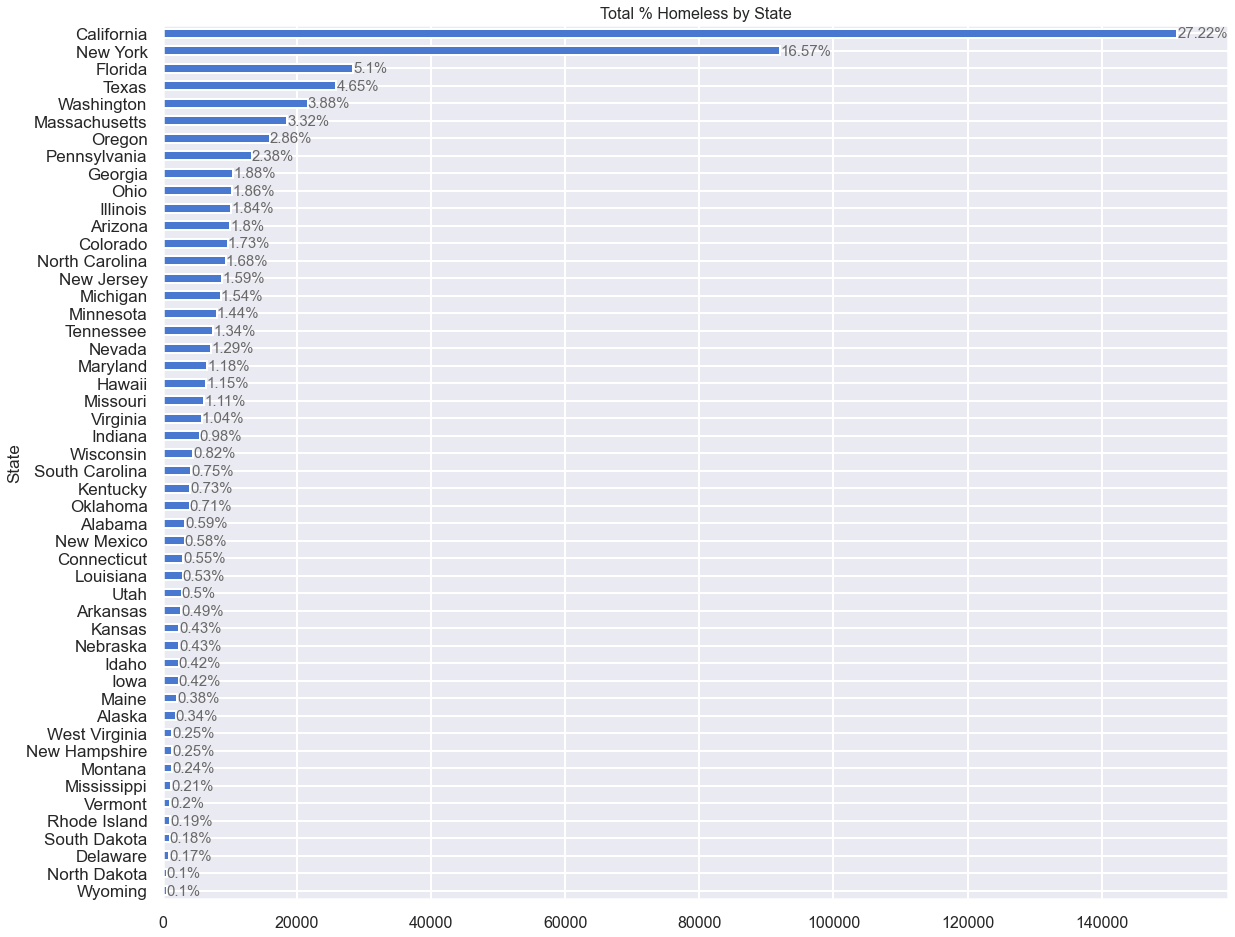

In [9]:
cmap = sns.color_palette("Blues", n_colors = 10)
ax = df.sort_values('Total Homeless' ,ascending=True)[['State','Total Homeless']]\
        .plot.barh(legend = False, stacked=True, title = 'Total % Homeless by State', x = 'State', figsize = (17,15));
ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.4, i.get_y(), \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

plt.show();


### Total Homeless by each State (Counts)

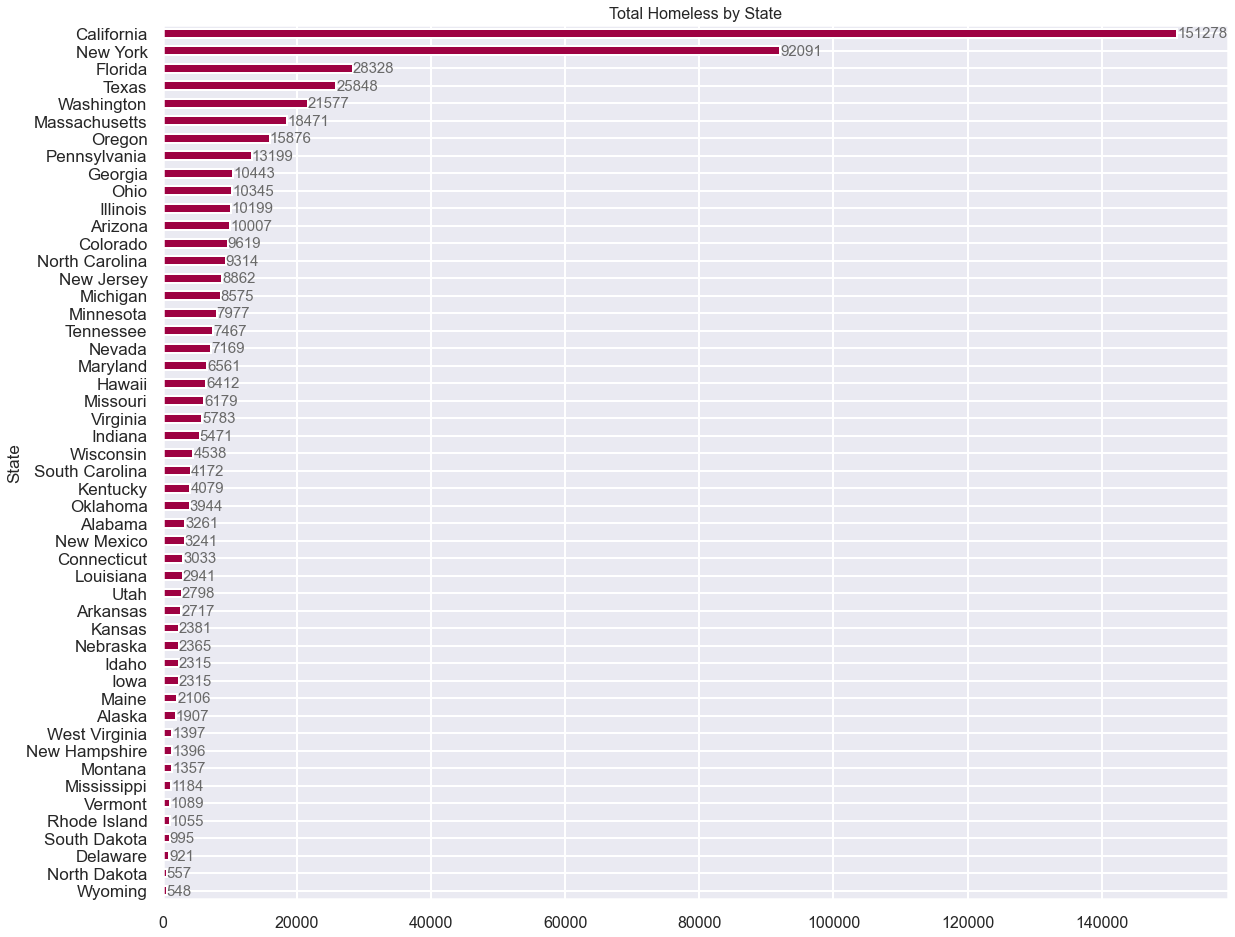

In [10]:
ax = df.sort_values('Total Homeless' ,ascending=True)[['State','Total Homeless']]\
        .plot.barh(legend = False, stacked=True, title = 'Total Homeless by State', x = 'State', cmap = plt.get_cmap('Spectral'), figsize = (17,15));
ax.set_alpha(0.8)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.4, i.get_y(), \
            str(int(i.get_width())), fontsize=15,
color='dimgrey')

plt.show();

#### Lollipon Plot  
## Percentage of Homeless to the Total Population

In [17]:
dfpct = df.sort_values(by = 'Percentage', axis=0, ascending = True).reset_index(drop = True)
dfpct

,State,Total Homeless,Population,Percentage,Homeless Households,Veterans,Young Adults
0,Mississippi,1184.0,2976149.0,0.000398,69.0,72.0,56.0
1,Louisiana,2941.0,4648794.0,0.000633,170.0,360.0,188.0
2,Alabama,3261.0,4903185.0,0.000665,236.0,292.0,320.0
3,Virginia,5783.0,8535519.0,0.000678,652.0,447.0,258.0
4,North Dakota,557.0,762062.0,0.000731,51.0,49.0,72.0
5,Iowa,2315.0,3155070.0,0.000734,227.0,149.0,146.0
6,Wisconsin,4538.0,5822434.0,0.000779,592.0,359.0,200.0
7,West Virginia,1397.0,1792147.0,0.000780,79.0,137.0,89.0
8,Illinois,10199.0,12671821.0,0.000805,1105.0,690.0,609.0
9,South Carolina,4172.0,5148714.0,0.000810,275.0,462.0,216.0


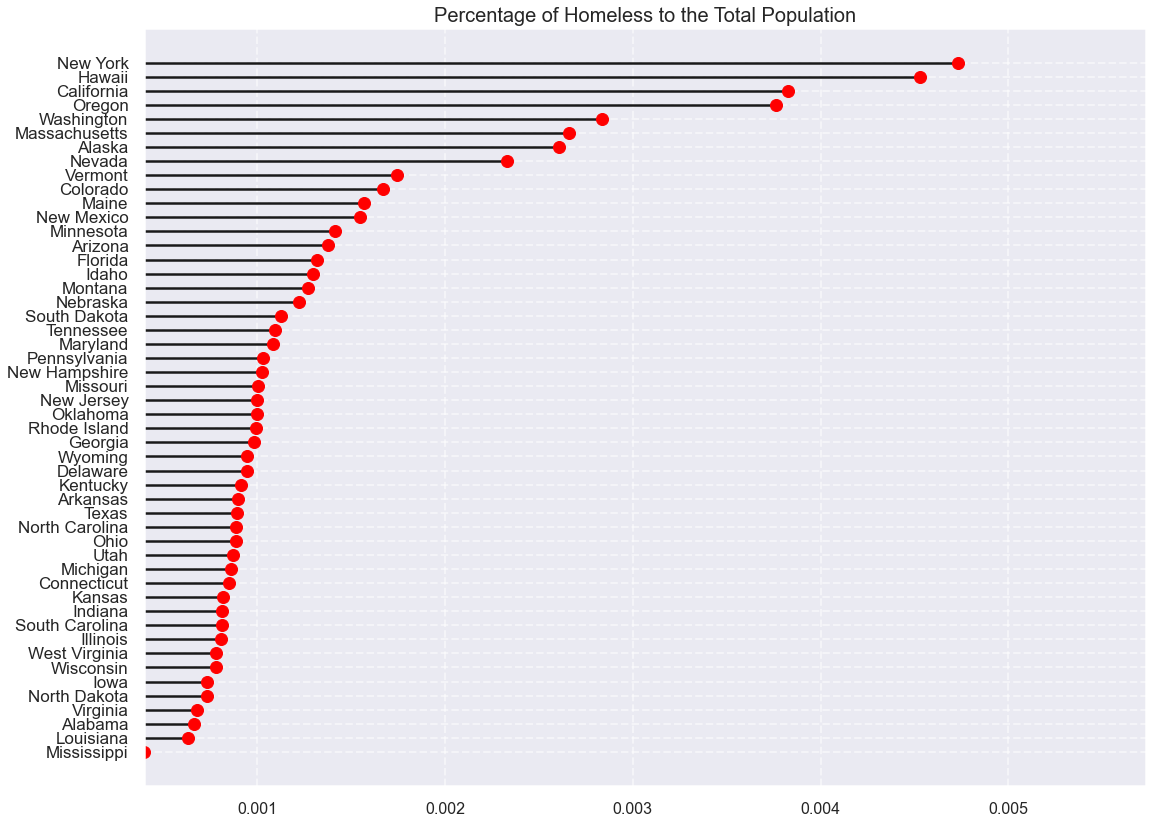

In [18]:
fig, ax = plt.subplots(figsize = (16,13))

ax.hlines(dfpct.State, xmin=0, xmax=dfpct['Percentage'])
ax.plot(dfpct['Percentage'], dfpct.State, "o", color='red')
ax.set_xlim(dfpct['Percentage'].min(), dfpct['Percentage'].max()+0.001)

    
# Decorate
plt.title('Percentage of Homeless to the Total Population', fontdict={'size':20});
plt.grid(linestyle='--', alpha=0.5);

plt.show();

#### Treemap
## Treemap of Total Homeless

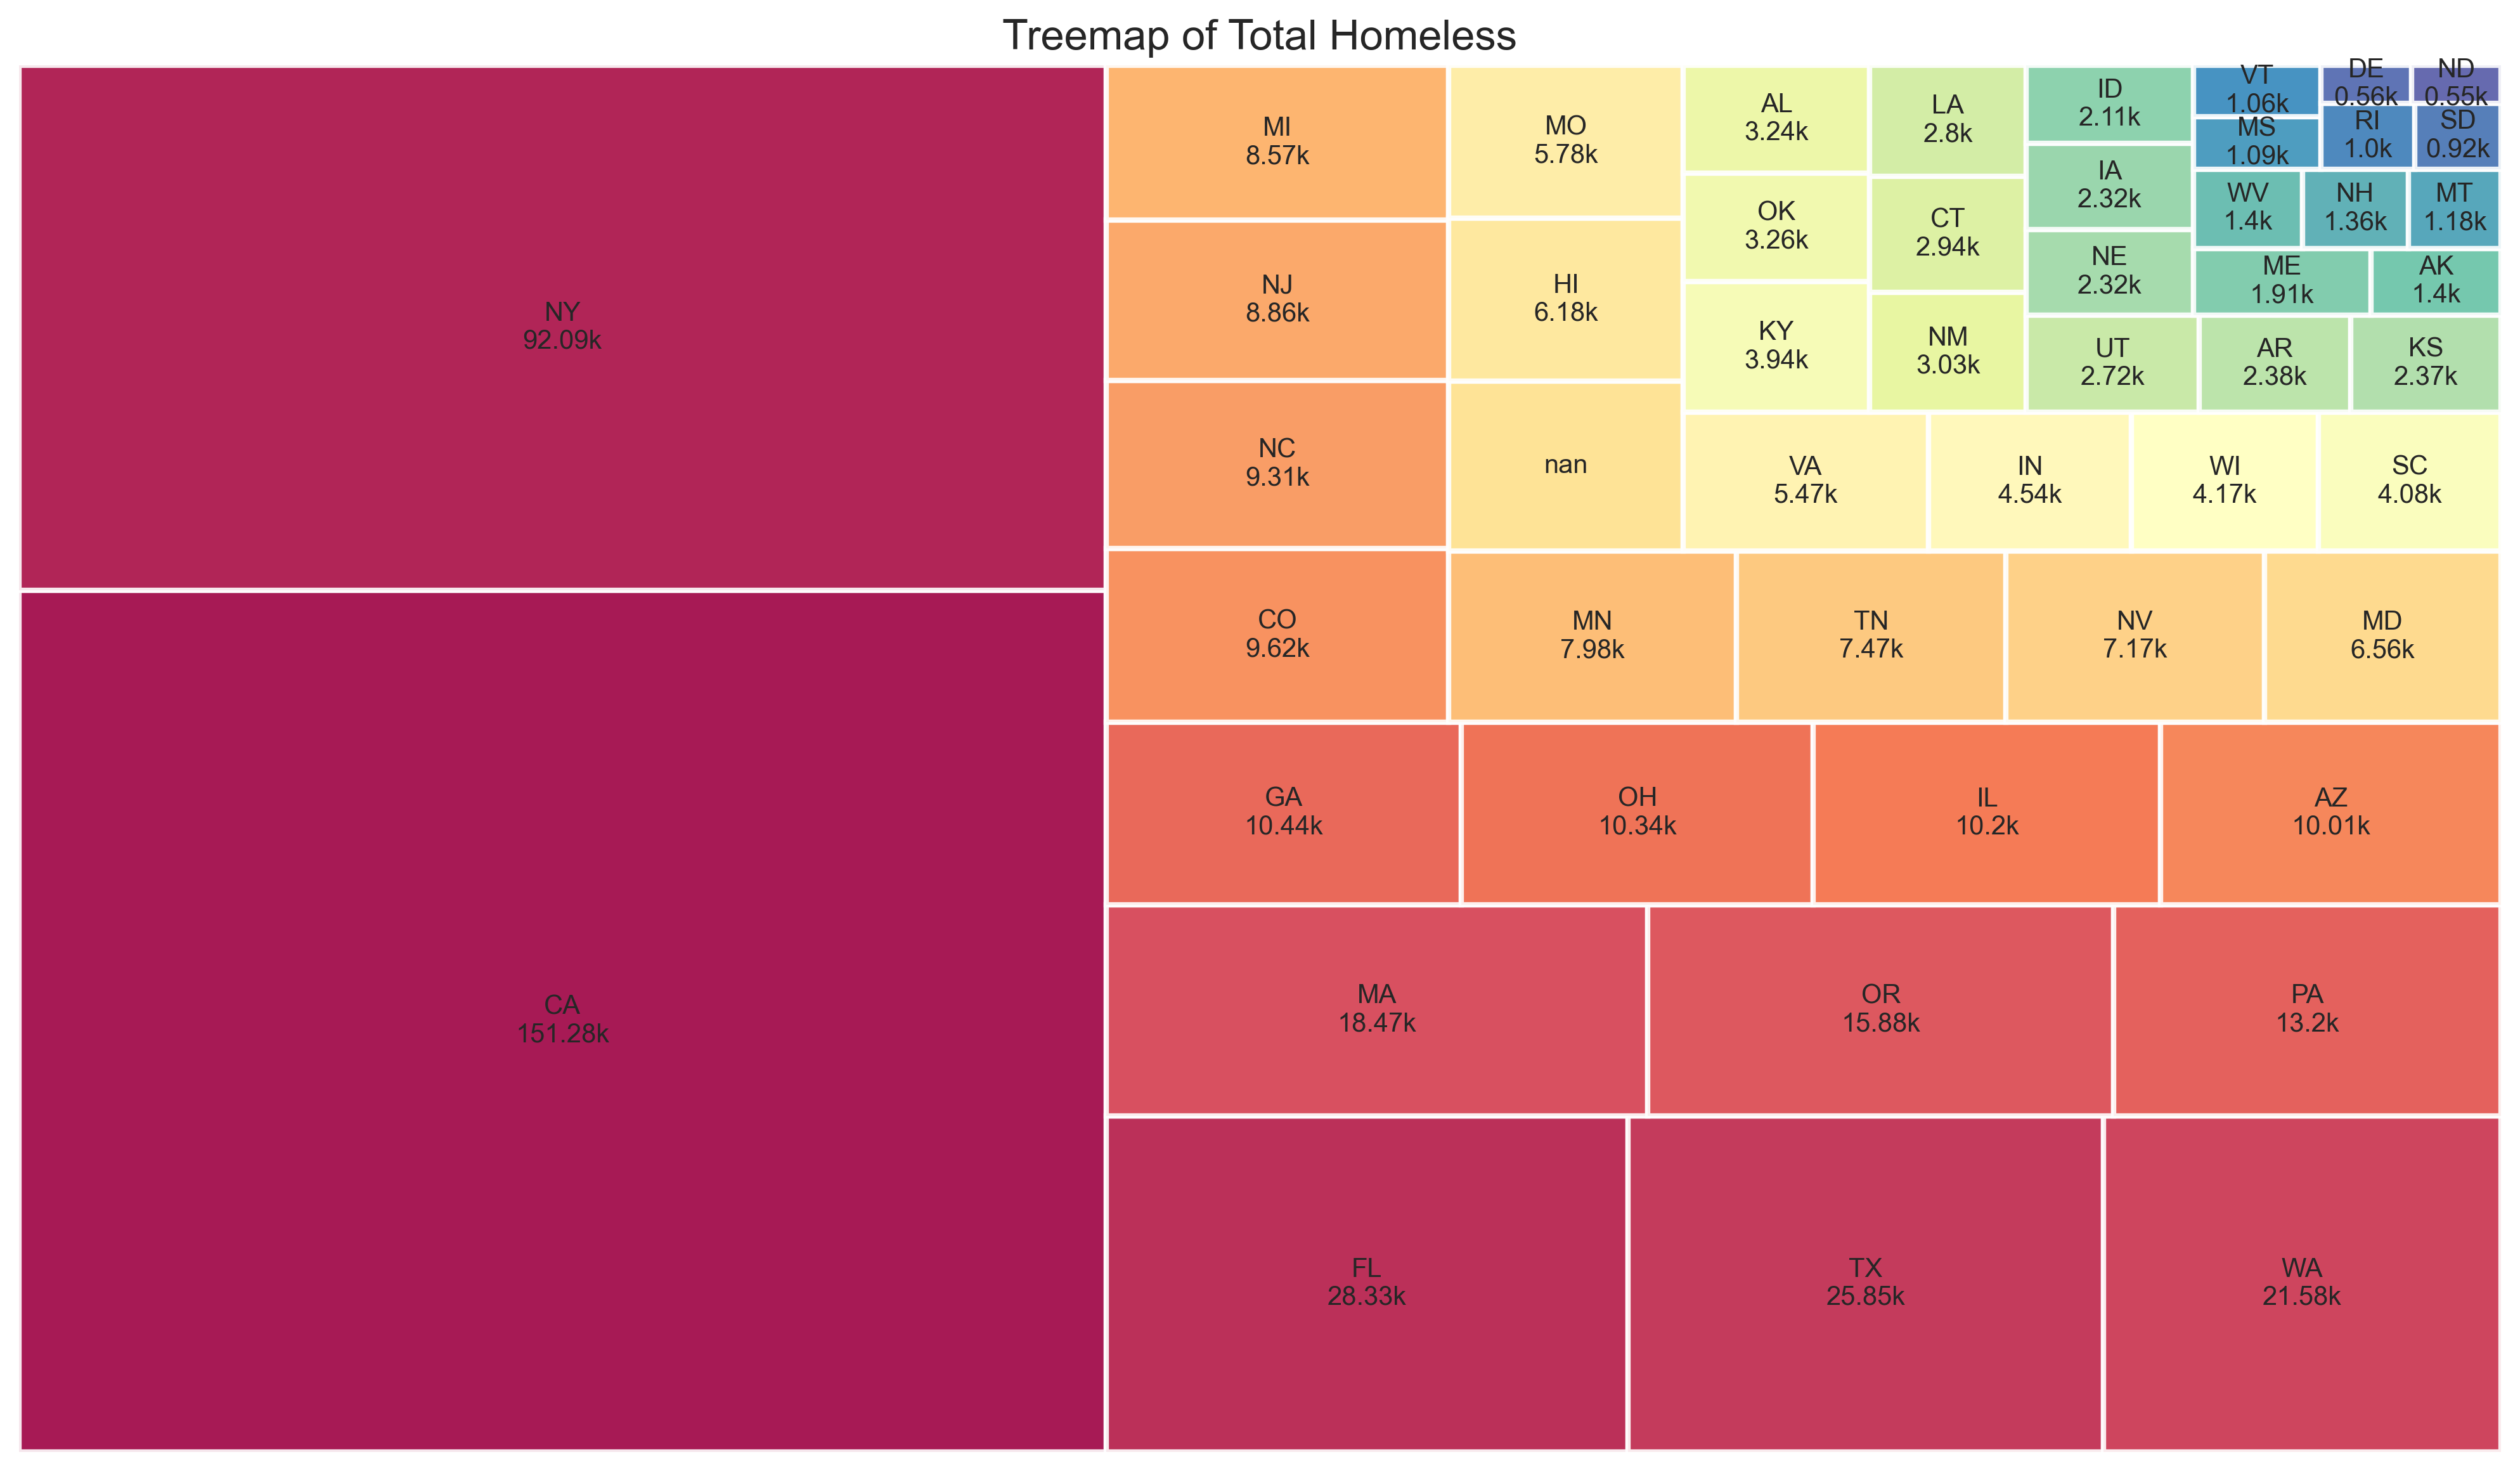

In [19]:
df = df_copy['Total Homeless']
labels = df_copy.Statecode
sizes = df_copy['Total Homeless']
labels_ = pd.Series([str(i) + 'k' for i in list(np.round(sizes.values/1000,2))])
final_labels = labels  + '\n' + labels_
    
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 300)
squarify.plot(sizes=sizes, label=final_labels, color=colors, bar_kwargs={'alpha':.9},text_kwargs={'fontsize':10})

# Decorate
plt.title('Treemap of Total Homeless')
plt.axis('off')
plt.show();

#### Stacked Bars

## Total Homeless by Groups - Veterans/Young Adults

In [25]:
df_copy

,State,Total Homeless,Population,Percentage,Homeless Households,Veterans,Young Adults,Statecode
0,California,151278.0,39512223.0,0.003829,7044.0,10980.0,11993.0,CA
1,New York,92091.0,19453561.0,0.004734,15091.0,1270.0,2978.0,NY
2,Florida,28328.0,21477737.0,0.001319,2171.0,2472.0,1450.0,FL
3,Texas,25848.0,28995881.0,0.000891,1919.0,1806.0,1355.0,TX
4,Washington,21577.0,7614893.0,0.002834,1751.0,1585.0,1911.0,WA
5,Massachusetts,18471.0,6949503.0,0.002658,3766.0,917.0,480.0,MA
6,Oregon,15876.0,4217737.0,0.003764,1147.0,1438.0,1590.0,OR
7,Pennsylvania,13199.0,12801989.0,0.001031,1569.0,857.0,737.0,PA
8,Georgia,10443.0,10617423.0,0.000984,815.0,801.0,596.0,GA
9,Ohio,10345.0,11689100.0,0.000885,999.0,676.0,643.0,OH


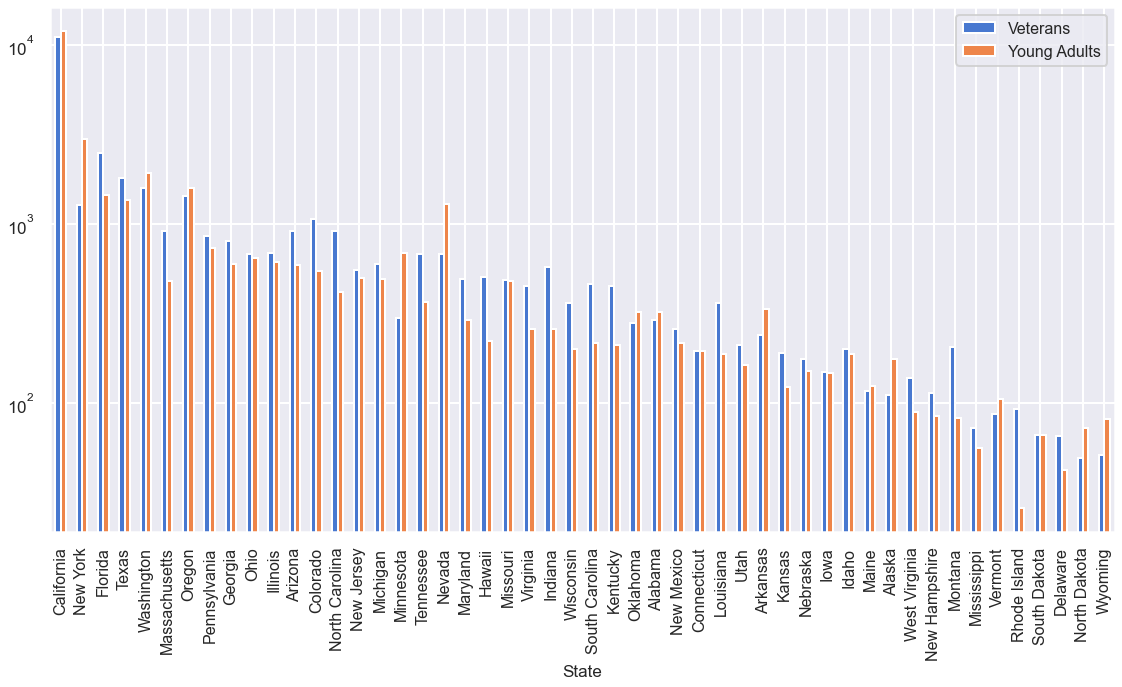

In [45]:
df_copy_grp = df_copy.set_index('State');
df_copy_grp[['Veterans','Young Adults']].plot(kind='bar', figsize = (17,9), stacked=False,logy=True);

In [40]:
sum(df_copy['Veterans'])

36658.0

In [41]:
sum(df_copy['Young Adults'])

34696.0

### Scatterplot
## Population versus Total Homeless by State

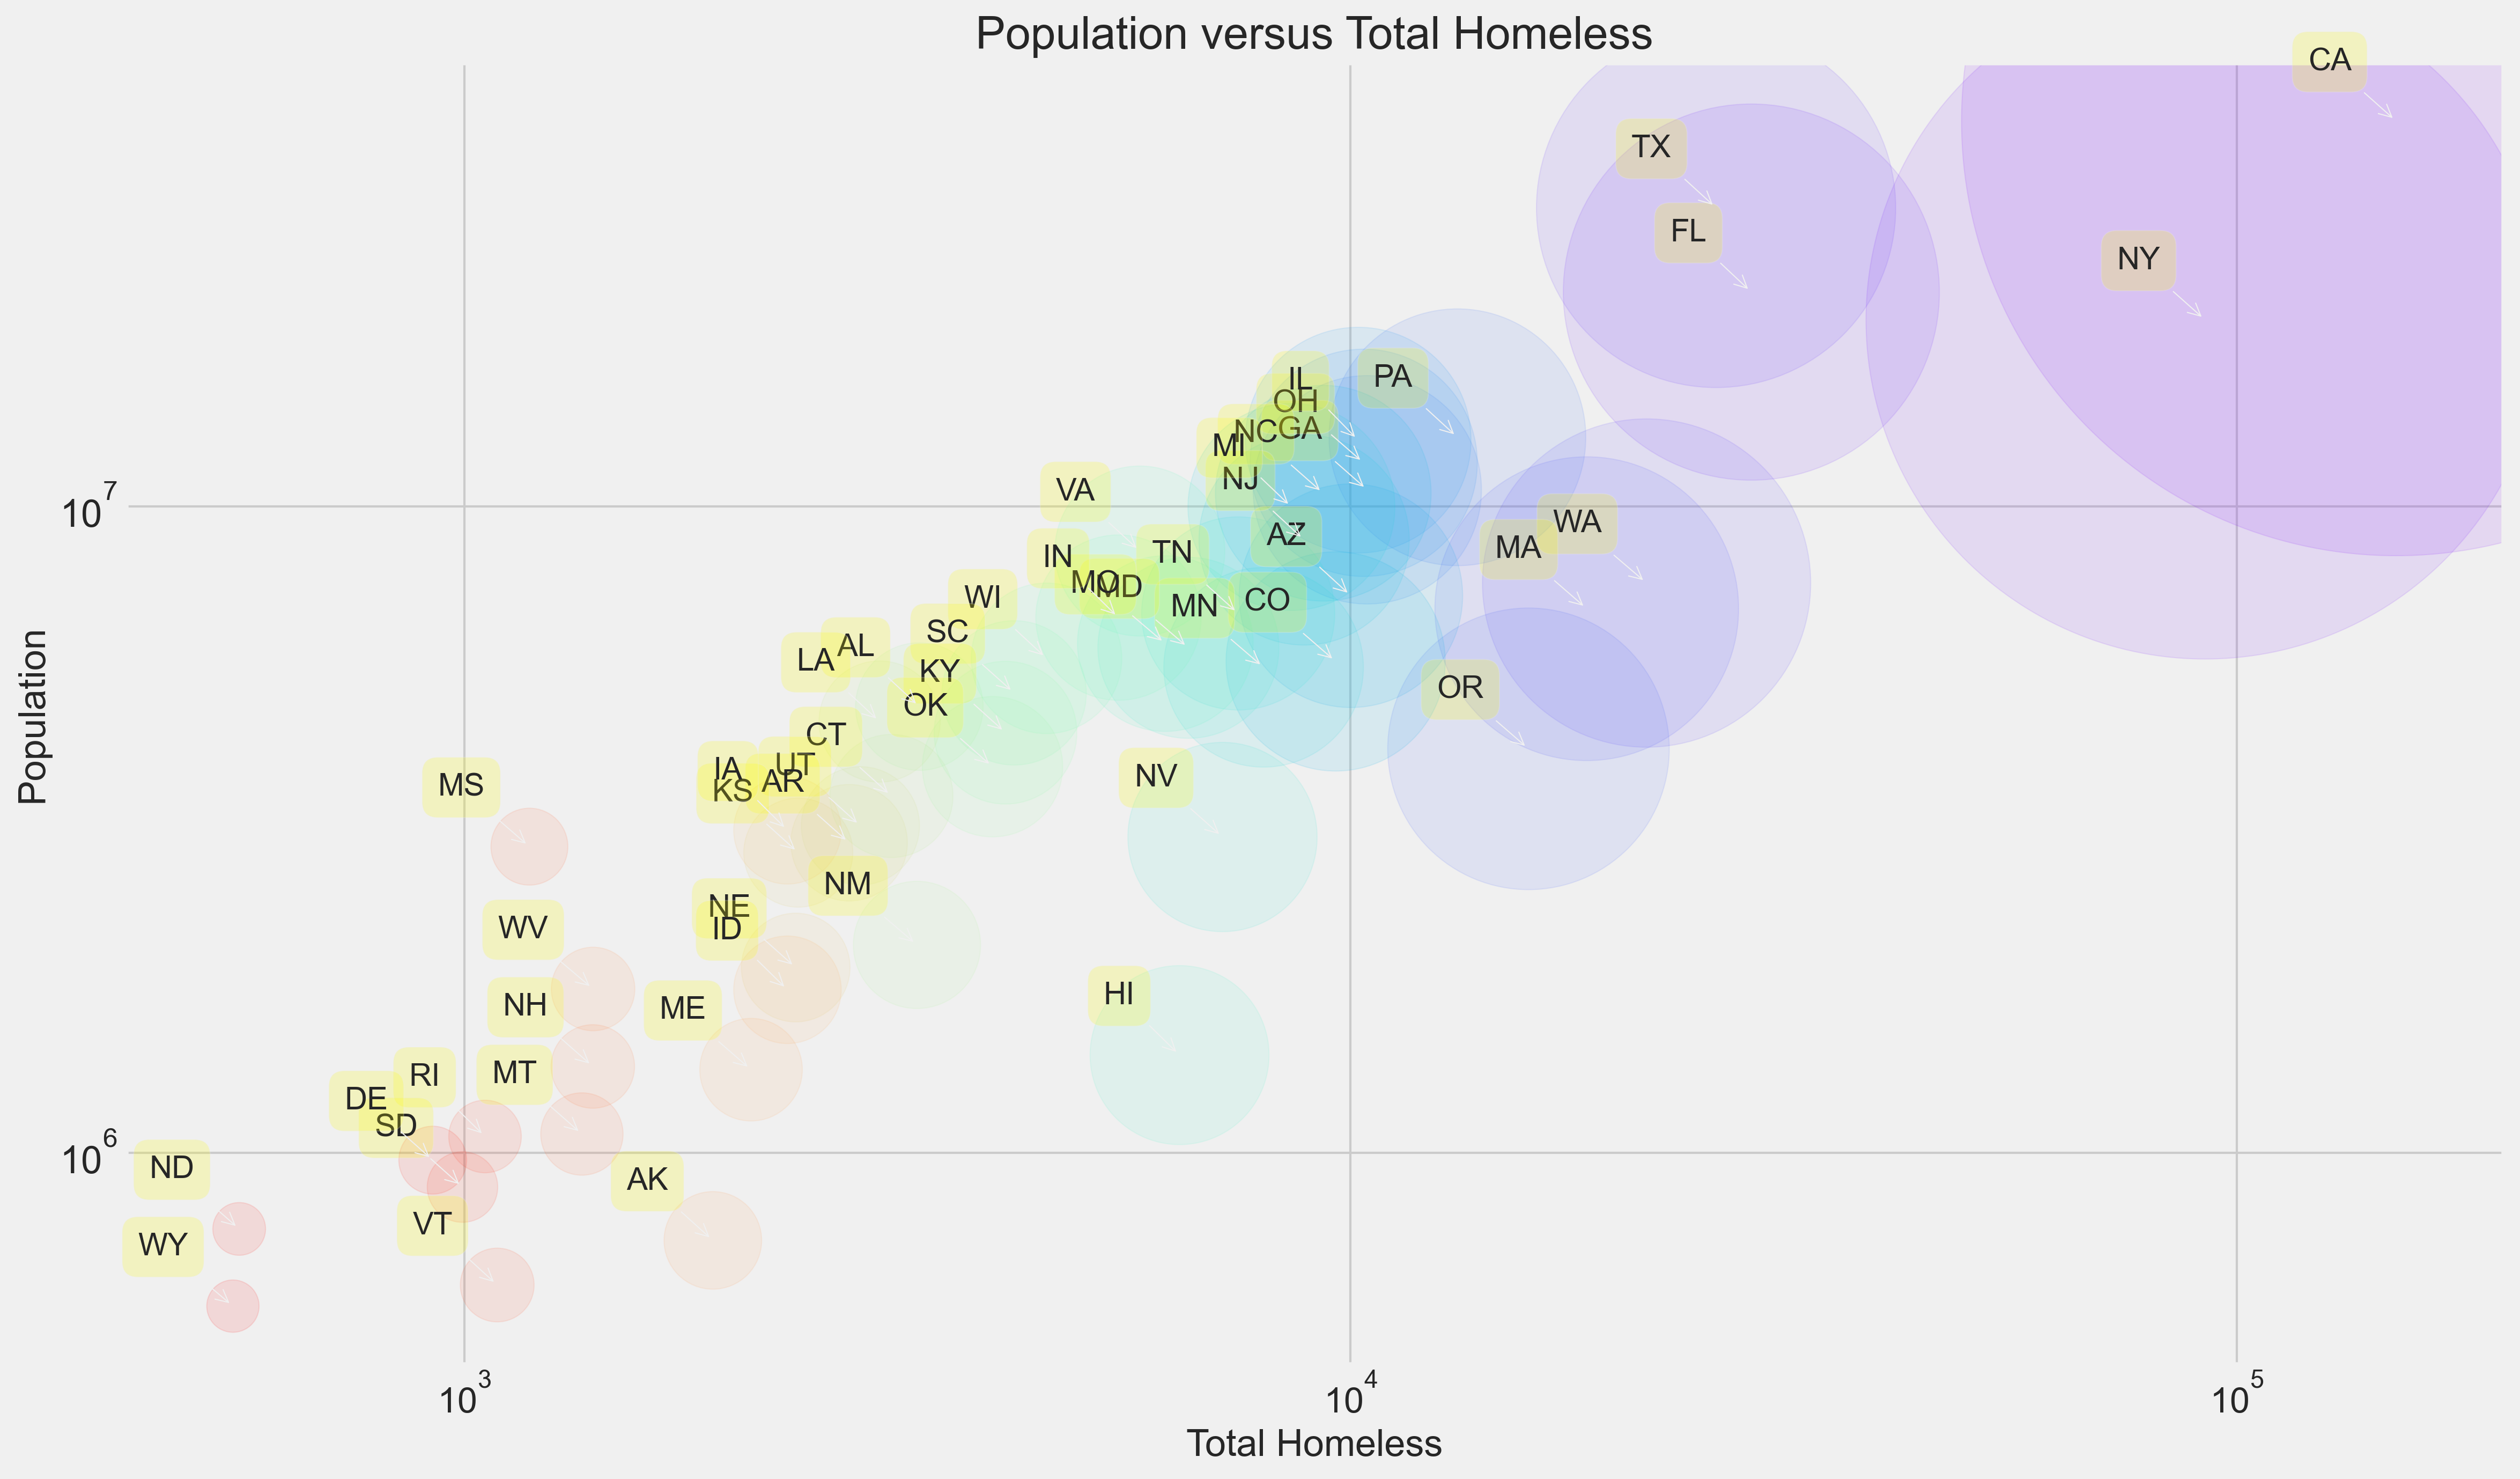

In [51]:
plt.figure(figsize=(17,10), dpi= 300)
plt.style.use('fivethirtyeight')
colors = cm.rainbow(np.linspace(0, 1, 50))
ax = plt.scatter(df_copy['Total Homeless'], df_copy['Population'], s=df_copy['Total Homeless'],c = colors,  alpha=0.1, cmap = plt.get_cmap('Spectral'))
plt.ylabel('Population')
plt.xlabel('Total Homeless')
plt.title('Population versus Total Homeless')

for label, x, y in zip(list(df_copy['Statecode']), df_copy['Total Homeless'], df_copy['Population']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
plt.yscale('log')
plt.xscale('log')
plt.show();

#### Dotplot

## Homeless Households by each State

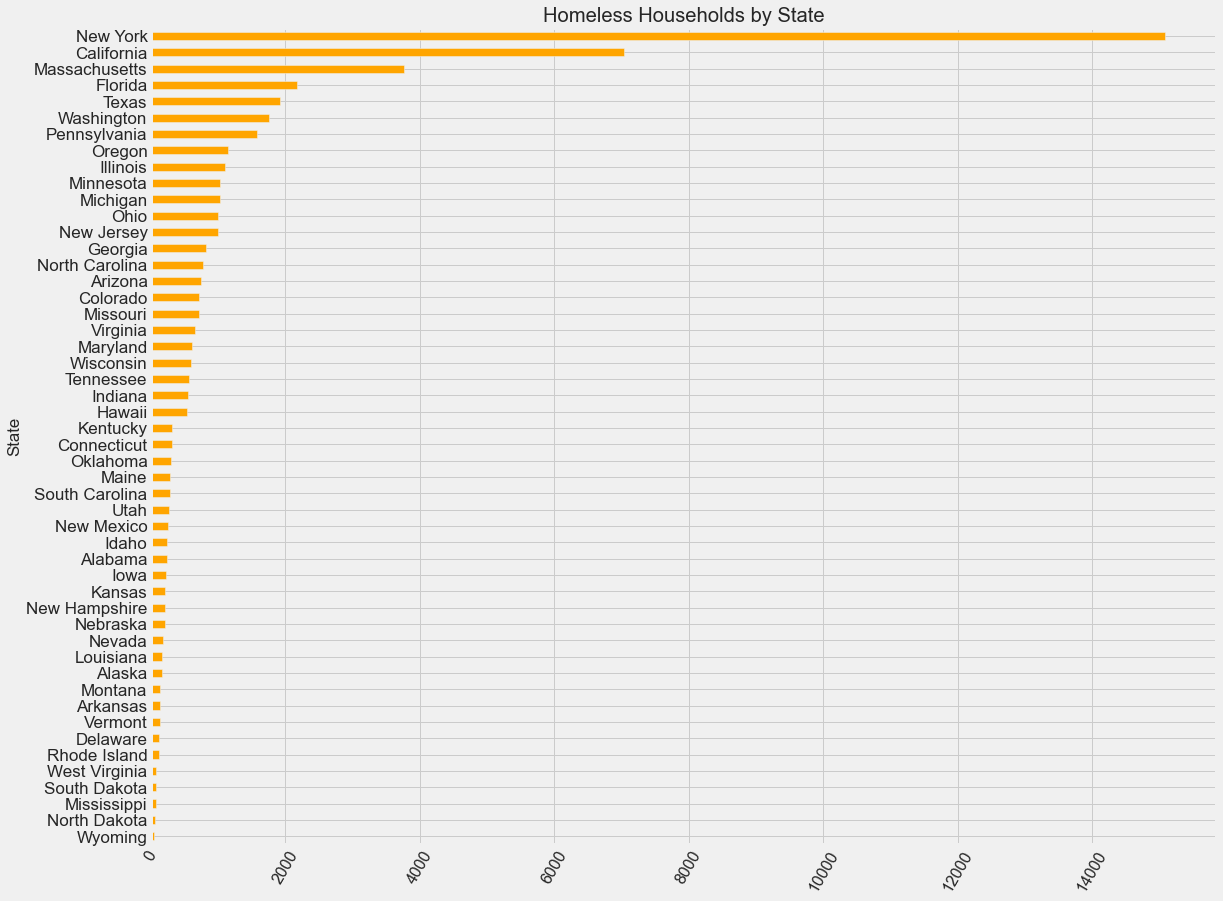

In [15]:
df_copy.sort_values('Homeless Households' ,ascending=True)[['State','Homeless Households']]\
        .plot.barh(legend = False, stacked=True, title = 'Homeless Households by State', x = 'State', color = 'orange', figsize = (17,14));
plt.xticks(rotation=60)
plt.show();

#### Diverging Bars
If you want to see the varyiation based on a single metric and visualize the order and amount of this variance, the diverging bars is a great tool. It helps to quickly differentiate the performance of items(for example State in this case)  and is quite intuitive and instantly conveys the point.

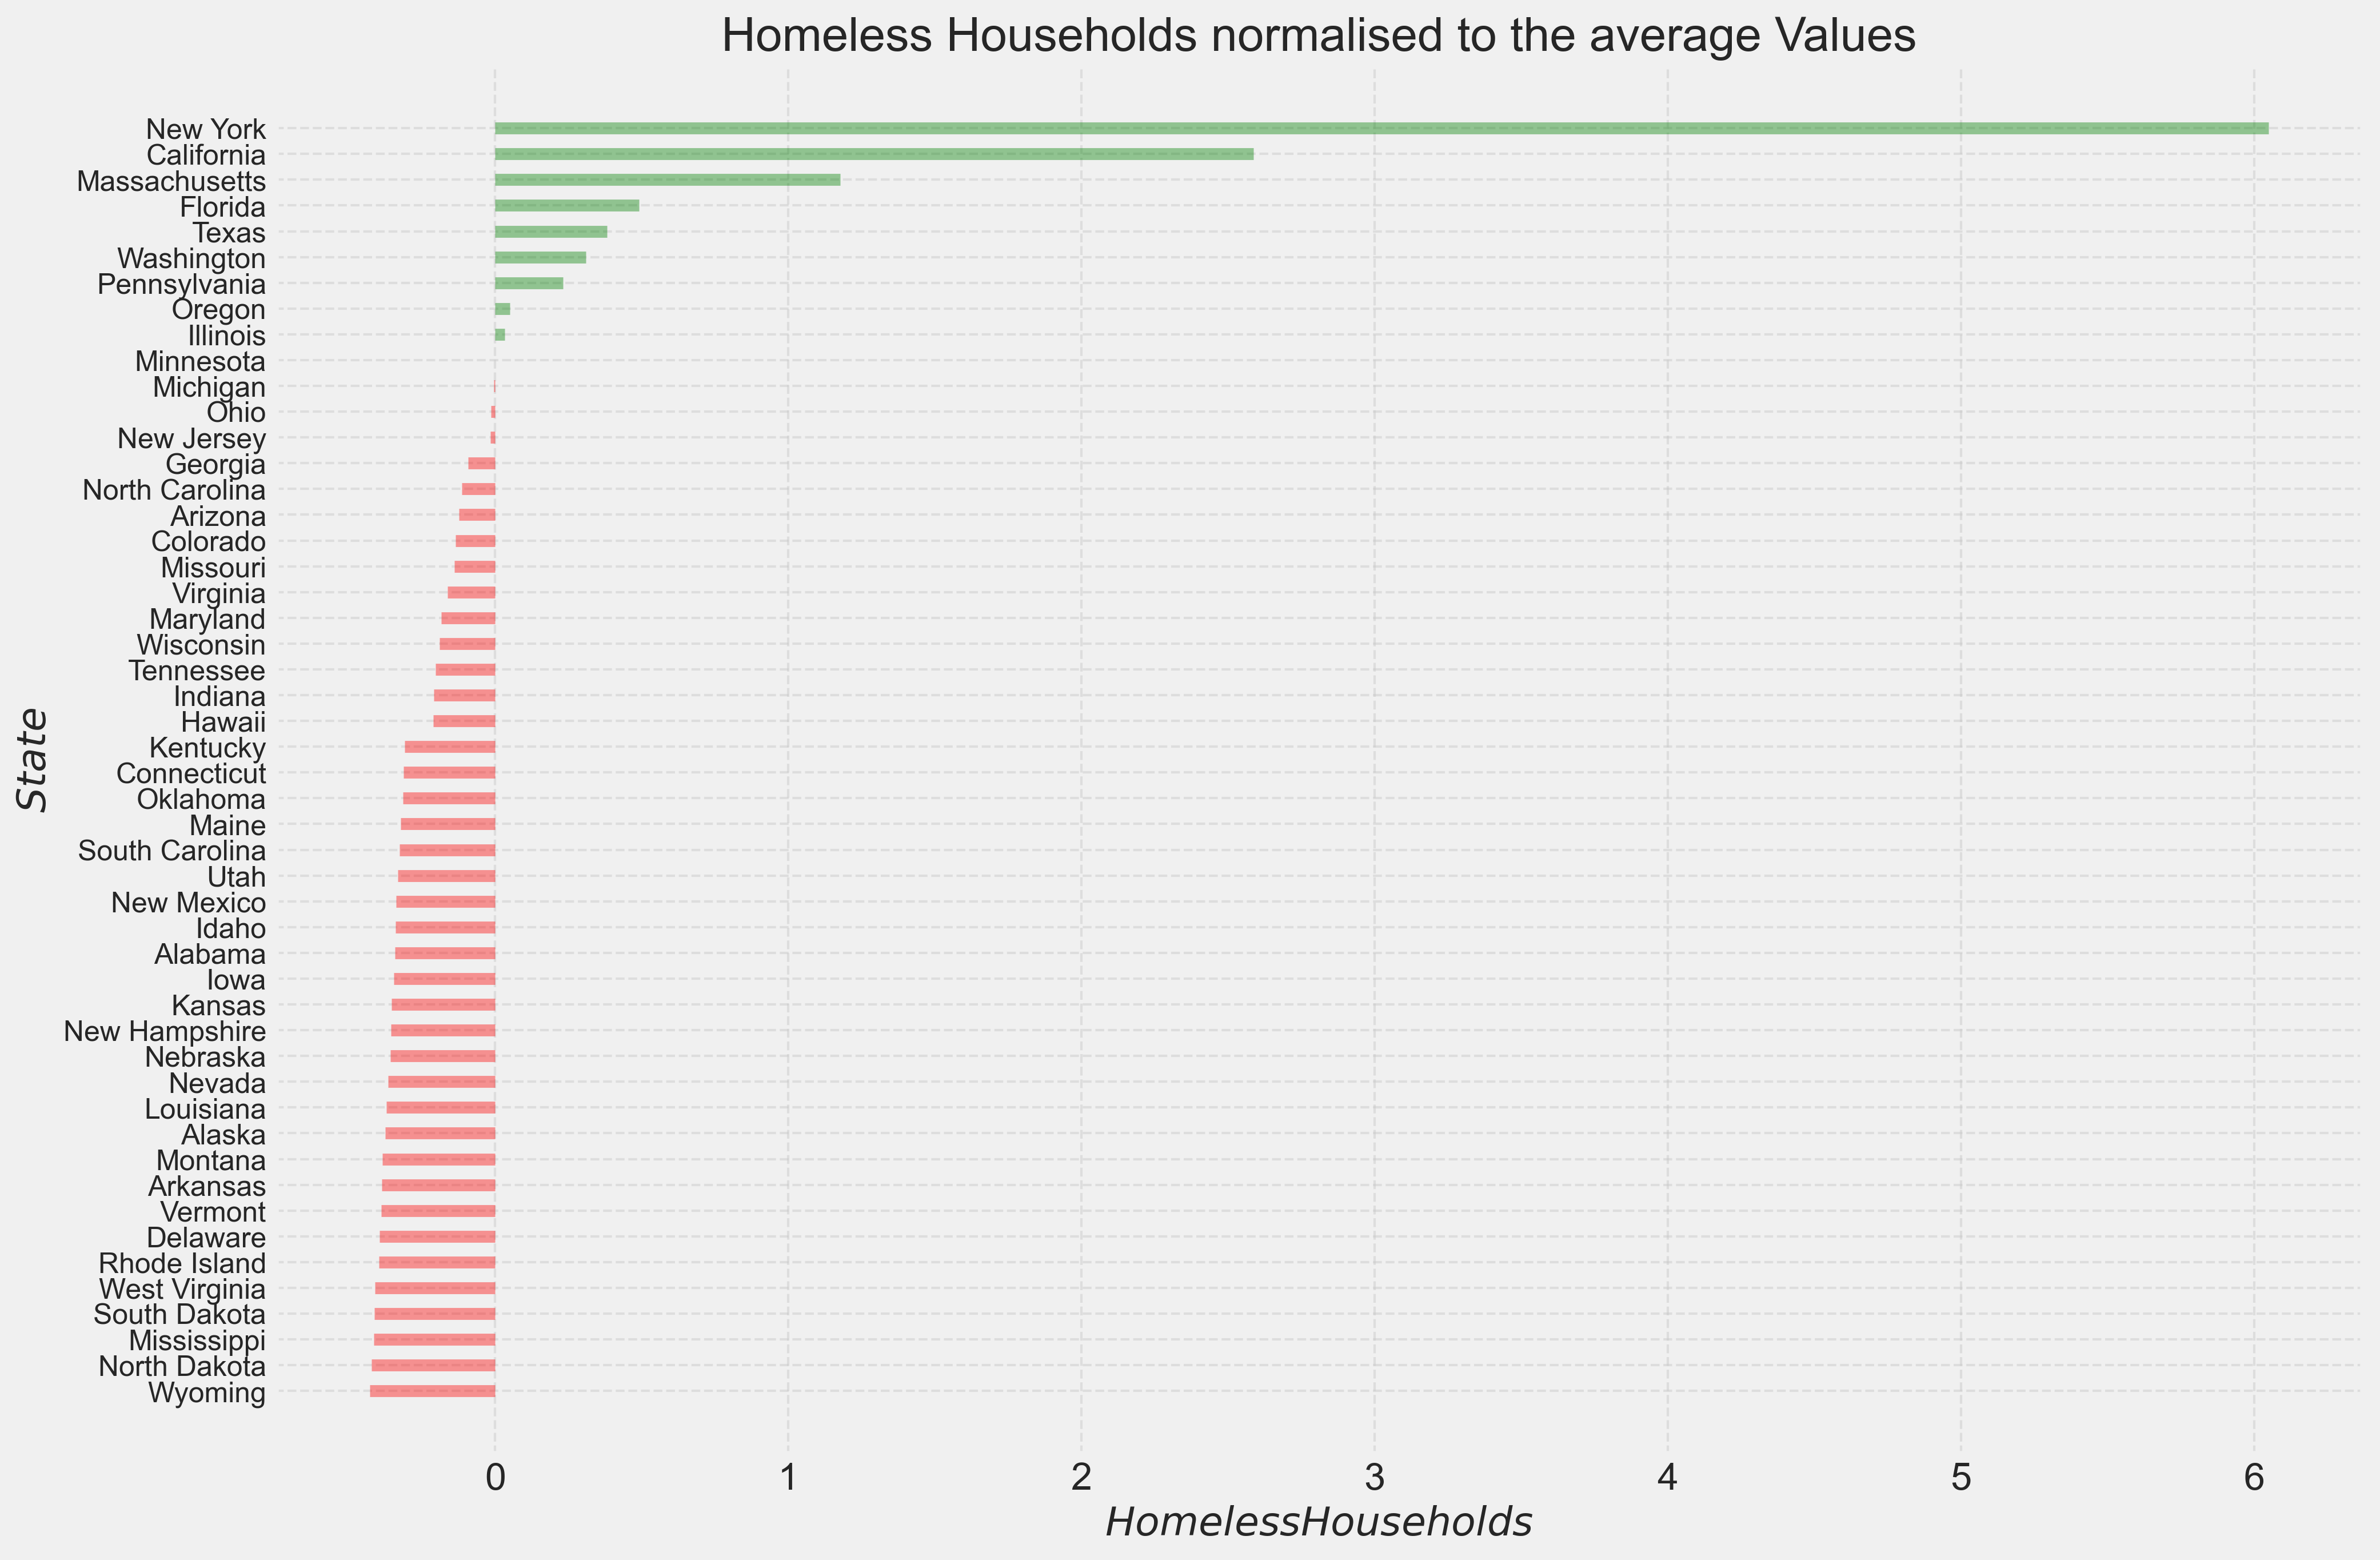

In [56]:
x = df_copy.loc[:, ['Homeless Households']]
df_copy['mean Homeless Households'] = (x - x.mean())/x.std()
df_copy['colors'] = ['red' if x < 0 else 'green' for x in df_copy['mean Homeless Households']]
df_copy.sort_values('mean Homeless Households', inplace=True)
df_copy = df_copy.reset_index(drop = True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 300)
plt.hlines(y=df_copy.index, xmin=0, xmax=df_copy['mean Homeless Households'], color=df_copy.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$State$', xlabel='$Homeless Households$')
plt.yticks(df_copy.index, df_copy.State, fontsize=12)
plt.title('Homeless Households normalised to the average Values', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show();

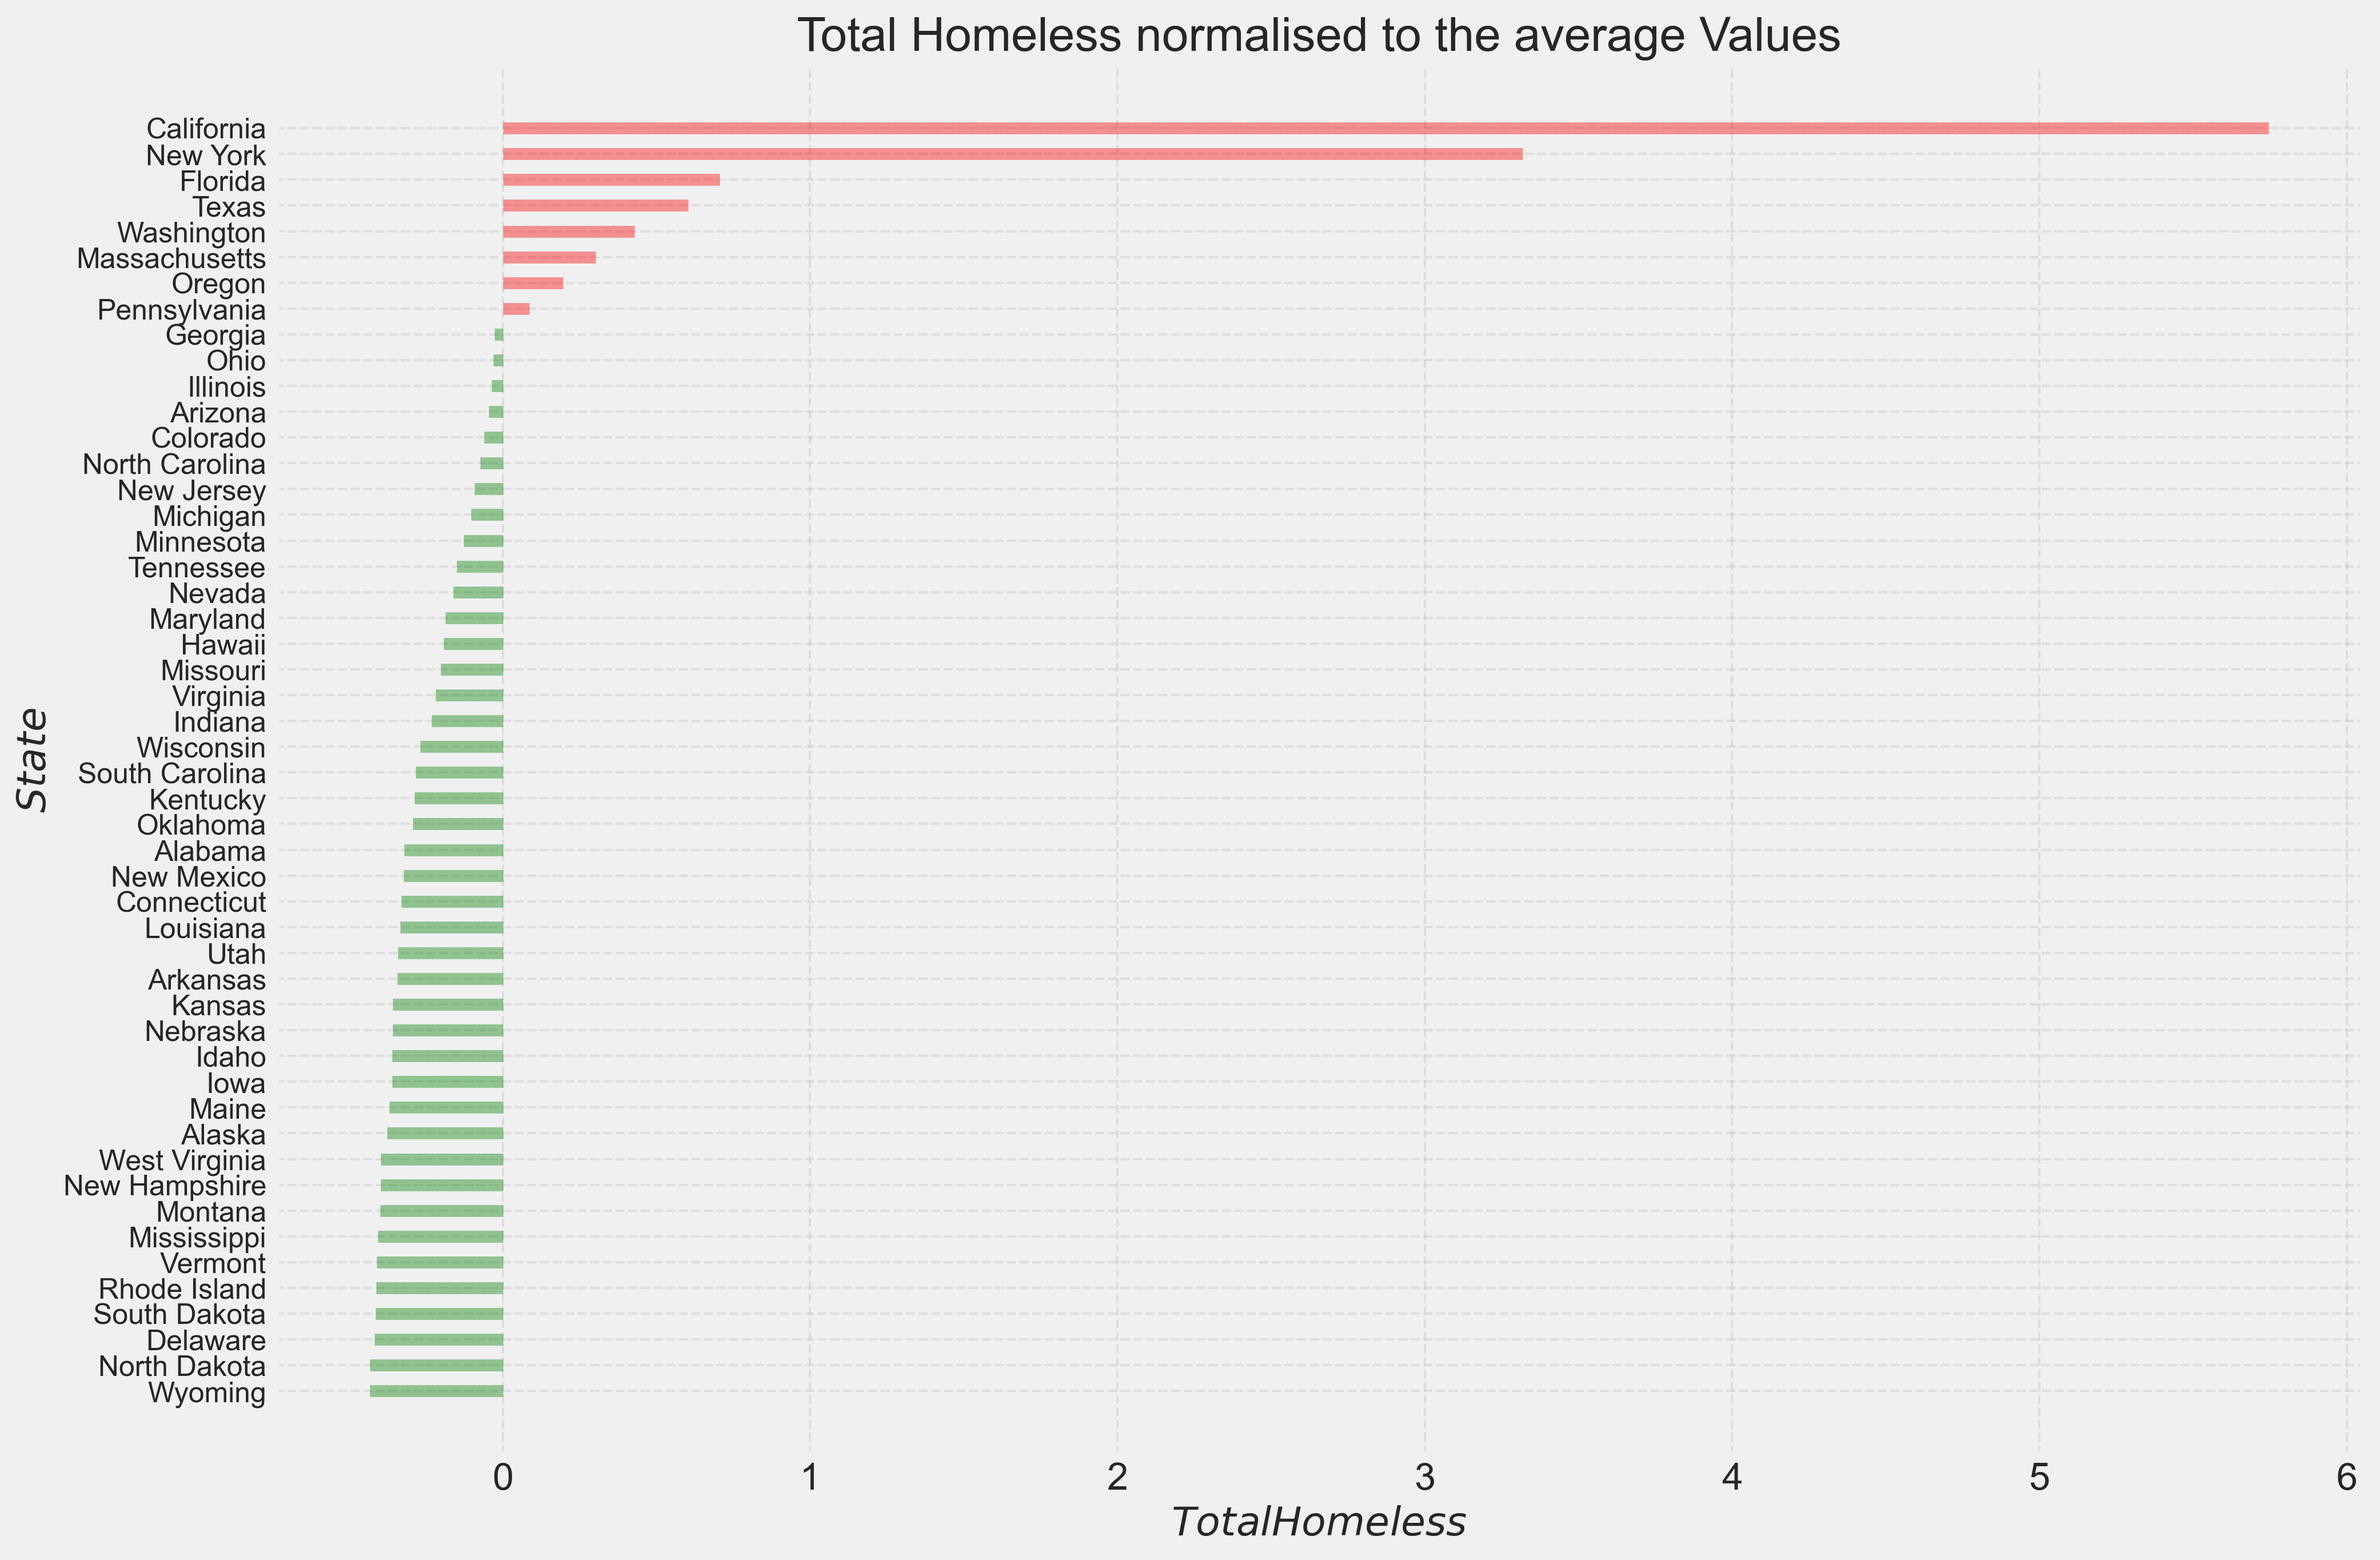

In [59]:
x = df_copy.loc[:, ['Total Homeless']]
df_copy['mean Total Homeless'] = (x - x.mean())/x.std()
df_copy['colors'] = ['red' if x > 0 else 'green' for x in df_copy['mean Total Homeless']]
df_copy.sort_values('mean Total Homeless', inplace=True)
df_copy = df_copy.reset_index(drop = True)

# Draw plot
plt.figure(figsize=(14,10), dpi= 300)
plt.hlines(y=df_copy.index, xmin=0, xmax=df_copy['mean Total Homeless'], color=df_copy.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$State$', xlabel='$Total Homeless$')
plt.yticks(df_copy.index, df_copy.State, fontsize=12)
plt.title('Total Homeless normalised to the average Values', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show();